In [27]:
import numpy as np
import keras
import matplotlib.pyplot as plt

(60000, 28, 28)
(60000,)
(10000, 28, 28)


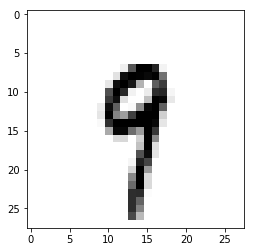

9


In [28]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

exampleindex = 600
digitimage = x_train[exampleindex]
digitlabel = y_train[exampleindex]

plt.imshow(digitimage, cmap=plt.cm.binary)
plt.show()
print(digitlabel)

In [29]:
test = x_train[0].reshape(-1,28*28)
print(x_train[0].shape)
print(test.shape)

(28, 28)
(1, 784)


In [30]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape=(28 * 28,)))
model.add(keras.layers.Dense(50,))
model.add(keras.layers.Dense(50,))
model.add(keras.layers.Dense(1,))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 86,151
Trainable params: 86,151
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='sgd', loss='mse')

hist = model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: nan
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: nan
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: nan
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: nan
Epoch 5/10
30400/60000 [==============>...............] - ETA: 1s - loss: nan

KeyboardInterrupt: 

In [33]:
preds = model.predict(x_test)

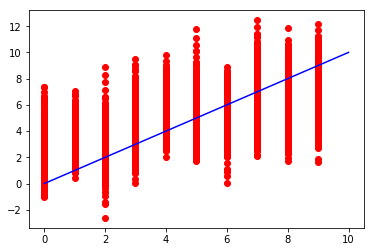

In [40]:
import matplotlib.pyplot as plt

#plt.plot(y_test, 'ro')
#plt.plot(preds, 'bo')
plt.plot(y_test, preds, 'ro')
plt.plot([0,10], [0,10], 'b')

In [44]:
print(preds.shape)
print(preds)
print(preds[:,0])
print(y_test.shape)

print(np.sum(np.round(preds[:,0]) == y_test) / len(y_test))

(10000, 1)
[[6.5759296]
 [3.0006459]
 [1.8787982]
 ...
 [8.461489 ]
 [5.6116385]
 [5.8189363]]
[6.5759296 3.0006459 1.8787982 ... 8.461489  5.6116385 5.8189363]
(10000,)
0.197
